## **Cartoonize an Image**

Steps:
1. Import libraries
2. Read an image
3. Blurring
4. Edge mask
5. Remove noise
6. Eroding and dilating
7. Overlay edge mask on image

### Import Libraries

In [89]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easygui
import imageio

### Read an Image

Use easygui library to easily upload image from system.

In [90]:
img_path = easygui.fileopenbox()
img = cv2.imread(img_path)

if img is None:
    print("Image not found. Choose appropriate file.")
    sys.exit()

# Convert BGR to GRAYSCALE
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Blurring

Types of available blurring
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur

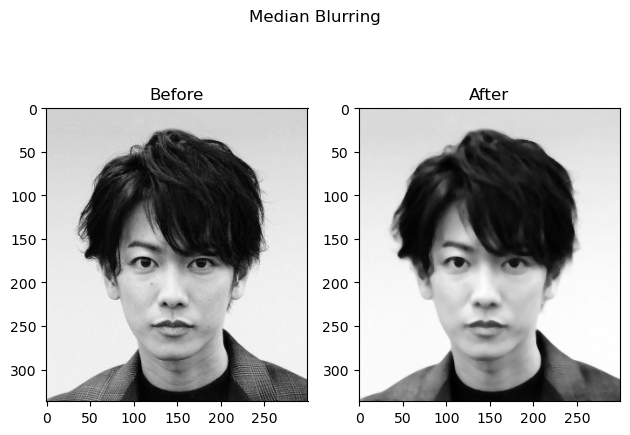

In [109]:
# Median Blurring
img_blur = cv2.medianBlur(img_grey, 5)
# img_blur = cv2.GaussianBlur(img_grey, (5,5), sigmaX=3, sigmaY=0)
fig = plt.figure()
fig.suptitle("Median Blurring")
ax1 = fig.add_subplot(121)
ax1.set_title("Before")
ax1.imshow(img_grey, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.set_title("After")
ax2.imshow(img_blur, cmap='gray')

fig.tight_layout()

plt.show()

### Edge Mask

Use adaptive thresholding to create edge mask

*Adaptive thresholding*: Different thresholds for different region

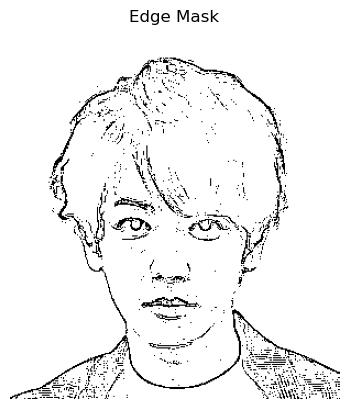

In [110]:
edges = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,3)
plt.axis("off")
plt.title("Edge Mask")
plt.imshow(edges, cmap="gray")
plt.show()

### Remove Noise

Remove unwanted artifacts (e.g. grainy structures) from the original image by performing bilateral blurring.

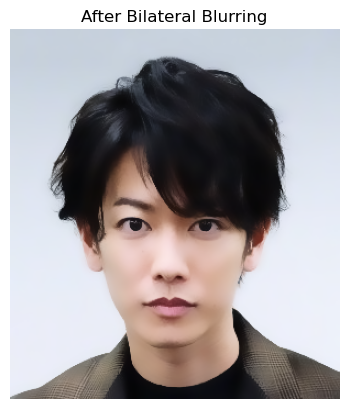

In [111]:
# Image Filtering: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
img_bb = cv2.bilateralFilter(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), 15, 75, 75)
plt.imshow(img_bb)
plt.axis("off")
plt.title("After Bilateral Blurring")
plt.show()

### Eroding abd Dilating

Erosion
- Erodes away the boundaries of the foreground object
- Used to diminish the features of an image.

Dilation
- Increases the object area
- Used to accentuate features

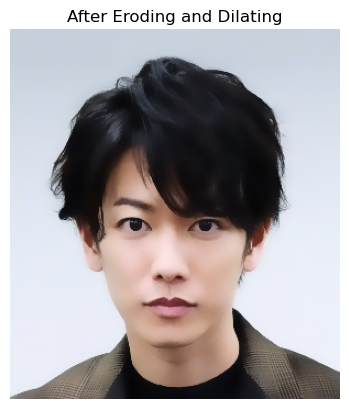

In [112]:
kernel = np.ones((1,1),np.uint8)
img_erode = cv2.erode(img_bb,kernel,iterations=3)
img_dilate = cv2.dilate(img_erode,kernel,iterations=3)
plt.imshow(img_dilate)
plt.axis("off")
plt.title("After Eroding and Dilating")
plt.show()

### Overlay edge mask on image

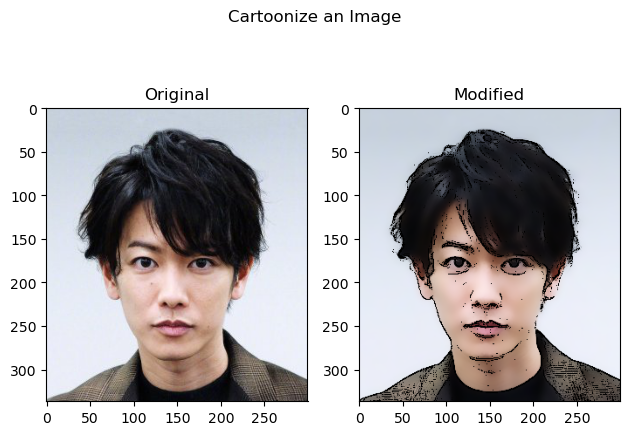

In [113]:
img_cartoon = cv2.bitwise_and(img_dilate, img_dilate, mask=edges)

fig = plt.figure()
fig.suptitle("Cartoonize an Image")
ax1 = fig.add_subplot(121)
ax1.set_title("Original")
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(122)
ax2.set_title("Modified")
ax2.imshow(img_cartoon)

fig.tight_layout()

plt.show()